In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import StandardScaler

from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report


from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.decomposition import PCA


In [2]:
train=pd.read_csv('SalaryData_Train(1).csv')
train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
test=pd.read_csv('SalaryData_Test(1).csv')
test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


In [7]:
train1=pd.get_dummies(train)
train1

,age,educationno,capitalgain,capitalloss,hoursperweek,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native_ Scotland,native_ South,native_ Taiwan,native_ Thailand,native_ Trinadad&Tobago,native_ United-States,native_ Vietnam,native_ Yugoslavia,Salary_ <=50K,Salary_ >50K
0,39,13,2174,0,40,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
1,50,13,0,0,13,0,0,0,0,1,...,0,0,0,0,0,1,0,0,1,0
2,38,9,0,0,40,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
3,53,7,0,0,40,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
4,28,13,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,12,0,0,38,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
30157,40,9,0,0,40,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
30158,58,9,0,0,40,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
30159,22,9,0,0,20,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0


In [8]:
test1=pd.get_dummies(test)
test1

,age,educationno,capitalgain,capitalloss,hoursperweek,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native_ Scotland,native_ South,native_ Taiwan,native_ Thailand,native_ Trinadad&Tobago,native_ United-States,native_ Vietnam,native_ Yugoslavia,Salary_ <=50K,Salary_ >50K
0,25,7,0,0,40,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
1,38,9,0,0,50,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
2,28,12,0,0,40,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
3,44,10,7688,0,40,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
4,34,6,0,0,30,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,13,0,0,40,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
15056,39,13,0,0,36,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
15057,38,13,0,0,50,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
15058,44,13,5455,0,40,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0


In [9]:
# As we can see in our dataset that there are large amount of columns are available out of them we will try to extract some by using PCA

# PCA

In [10]:
from sklearn.preprocessing import MinMaxScaler
trans=MinMaxScaler()
train_scaler=pd.DataFrame(trans.fit_transform(train1))
test_scaler=pd.DataFrame(trans.fit_transform(test1))

In [11]:
pca_train = PCA(n_components = 102)
pca_train_values = pca_train.fit_transform(train_scaler)
var = pca_train.explained_variance_ratio_
var1 = np.cumsum(np.round(var,decimals = 4)*100)
var1

array([19.99, 28.32, 35.12, 40.51, 45.55, 50.03, 53.9 , 57.66, 60.71,
       63.52, 66.02, 68.48, 70.79, 72.82, 74.73, 76.49, 78.17, 79.68,
       81.08, 82.27, 83.37, 84.42, 85.39, 86.35, 87.25, 88.09, 88.85,
       89.59, 90.31, 90.99, 91.67, 92.33, 92.98, 93.58, 94.14, 94.59,
       95.  , 95.37, 95.74, 96.07, 96.37, 96.66, 96.94, 97.2 , 97.46,
       97.69, 97.87, 98.04, 98.21, 98.33, 98.44, 98.54, 98.64, 98.72,
       98.79, 98.86, 98.93, 98.99, 99.05, 99.11, 99.17, 99.22, 99.27,
       99.32, 99.36, 99.4 , 99.44, 99.48, 99.52, 99.56, 99.59, 99.62,
       99.65, 99.68, 99.7 , 99.72, 99.74, 99.76, 99.78, 99.8 , 99.82,
       99.84, 99.85, 99.86, 99.87, 99.88, 99.89, 99.9 , 99.91, 99.92,
       99.93, 99.94, 99.95, 99.96, 99.96, 99.96, 99.96, 99.96, 99.96,
       99.96, 99.96, 99.96])

In [12]:
pca_test = PCA(n_components = 102)
pca_test_values = pca_test.fit_transform(test_scaler)

In [13]:
# From this data we can take first 54 entries from this

In [14]:
finaltrain = pd.concat([pd.DataFrame(pca_train_values[:,0:49]),
                     train[['Salary']]], axis = 1)
finaltrain

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,Salary
0,-0.593702,-0.093029,1.069228,0.804771,0.468331,0.298686,-0.096865,-0.298491,-0.269672,0.366989,...,0.040479,-0.032240,0.030737,-0.013209,0.021702,0.034913,-0.007168,-0.009899,0.009968,<=50K
1,1.007284,0.086743,0.197031,0.288883,0.853823,0.368197,-0.174562,-0.770842,0.169869,1.052626,...,0.063952,-0.010459,0.022813,0.144323,0.032028,-0.274449,-0.004185,-0.017817,0.010789,<=50K
2,-0.479141,-0.634098,-0.239235,1.060391,-0.173800,-0.758490,0.036160,0.213850,0.316483,-0.043889,...,-0.013957,-0.024227,-0.011908,0.007691,-0.008326,-0.032323,-0.002791,-0.007287,0.013153,<=50K
3,0.654948,-0.527640,-0.332927,-0.478883,0.229265,0.041278,1.220462,-0.335455,-0.173214,0.024223,...,0.058004,0.003083,0.026979,-0.029728,-0.037268,0.081372,-0.050834,0.001845,0.006137,<=50K
4,-0.395172,0.958168,-0.415908,-0.494133,-0.026463,0.440244,1.181695,-1.226619,-0.466743,-0.325741,...,-0.238506,-0.058040,-0.012702,0.023202,0.162791,0.039326,0.055969,-0.032880,-0.048994,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,-0.357227,0.603397,-0.652427,-0.546460,-0.045636,-0.087575,-0.337151,-0.600868,-0.380679,-0.082709,...,-0.001824,-0.022661,-0.002065,-0.028684,-0.011869,0.015242,-0.003526,-0.017694,0.002346,<=50K
30157,1.298760,-0.057742,-0.420733,0.118355,-0.887224,0.004743,-0.066750,0.408697,-0.066363,-0.114254,...,-0.005259,-0.007747,0.020189,0.043290,0.004549,-0.044318,-0.008265,-0.031602,-0.000503,>50K
30158,-1.002477,0.345354,-1.242358,0.019353,-0.252643,0.009110,-0.276778,0.018330,0.238973,-0.003302,...,-0.043856,-0.108705,-0.103586,-0.044546,-0.015386,0.063880,0.004171,-0.009860,0.010920,<=50K
30159,-0.688675,-0.993779,0.141930,-0.109043,-0.561382,0.606013,-0.394221,0.309572,0.301568,0.043020,...,-0.000318,-0.022435,0.014070,0.048017,0.014245,-0.128317,0.019502,-0.011176,0.005454,<=50K


In [15]:
finaltest = pd.concat([pd.DataFrame(pca_test_values[:,0:49]),
                     test[['Salary']]], axis = 1)
finaltest

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,Salary
0,-0.688995,-0.855734,0.569635,-0.634131,-0.058046,0.626522,1.123625,-0.044386,0.327135,0.056870,...,-0.003617,0.044022,-0.047841,-0.029806,0.064489,-0.052312,-0.042219,-0.031352,-0.005088,<=50K
1,0.778143,-0.788789,-0.638365,0.037625,-0.098755,-0.011069,-0.213663,-0.236826,-0.189286,0.026719,...,-0.037256,-0.012132,-0.029579,0.023587,-0.013504,0.016265,0.001088,0.038912,0.012135,<=50K
2,1.417466,0.575996,0.217442,0.150305,0.290594,0.444169,-0.064209,0.391390,0.052482,-0.137298,...,0.000636,-0.041598,0.002759,-0.048747,-0.061707,0.100931,-0.006037,0.010879,0.003988,>50K
3,1.177372,0.270754,0.110391,-0.772992,-0.184352,-0.244507,1.314781,0.728308,-0.252505,0.017211,...,-0.026264,0.009525,0.011193,-0.016885,-0.032653,0.059185,-0.034576,-0.019637,-0.004564,>50K
4,-0.737310,-0.655575,0.758638,0.313936,-0.180203,-0.218673,0.035875,-0.038732,-0.263330,-0.115733,...,0.008472,0.006786,0.000374,0.002198,-0.035295,0.034834,-0.004562,-0.026690,0.017251,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,-0.486326,-0.310689,1.140532,-0.223988,-0.147973,0.541964,-0.115880,-0.863360,0.592265,-0.409264,...,0.009387,0.016181,-0.011318,-0.000035,0.018850,-0.069167,-0.050667,-0.009185,0.004498,<=50K
15056,-1.046245,0.941208,0.058366,0.716090,-0.118344,-0.647103,-0.028248,-0.914377,0.125797,-0.475463,...,-0.027568,-0.032089,0.023660,-0.009659,-0.047434,0.017129,-0.009066,0.001376,-0.003723,<=50K
15057,0.857260,-0.019496,0.244127,-0.062054,0.139672,-0.176501,0.020730,-1.238853,-0.003839,-0.411942,...,-0.025007,-0.003765,-0.006063,-0.000775,0.022018,-0.070259,-0.048162,-0.003854,0.005858,<=50K
15058,-0.449289,-0.122407,0.242576,-0.089798,0.038189,-0.056109,0.777410,-0.526762,0.927069,0.236884,...,0.067550,0.030351,0.041976,-0.247184,0.133794,0.035754,-0.034523,-0.082105,0.026941,<=50K


In [18]:
array = finaltrain.values
X = array[0:2000:,0:49]
Y = array[0:2000:,49]

In [19]:
array

array([[-0.5937023465644325, -0.09302853223052014, 1.069228237419539,
        ..., -0.009899470955484015, 0.009968367780098901, ' <=50K'],
       [1.00728417536572, 0.08674290608146737, 0.197030552073851, ...,
        -0.017816827333137067, 0.010788905052754273, ' <=50K'],
       [-0.4791411773249247, -0.6340979140014409, -0.23923452685813276,
        ..., -0.007287294815701535, 0.013153419944545055, ' <=50K'],
       ...,
       [-1.0024766985538711, 0.3453538579498831, -1.242358442431369, ...,
        -0.009860316303592527, 0.010919787159019822, ' <=50K'],
       [-0.6886746598935176, -0.9937788997758754, 0.14193042181482735,
        ..., -0.011175964920891152, 0.005453713840644101, ' <=50K'],
       [0.36218800745701213, 1.3624992347230194, -0.7599915539488661,
        ..., -0.047957917003101494, 0.01726444213883347, ' >50K']],
      dtype=object)

# SVM

In [21]:
clf = SVC()
param_grid = [{'kernel':['rbf'],'gamma':[50,5,10,0.5],'C':[15,14,13,12,11,10,0.1,0.001] }]
gsv = GridSearchCV(clf,param_grid,cv=10)
gsv.fit(X,Y)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [15, 14, 13, 12, 11, 10, 0.1, 0.001],
                          'gamma': [50, 5, 10, 0.5], 'kernel': ['rbf']}])

In [23]:
clf

SVC()

In [24]:
gsv

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [15, 14, 13, 12, 11, 10, 0.1, 0.001],
                          'gamma': [50, 5, 10, 0.5], 'kernel': ['rbf']}])

In [25]:
gsv.best_params_ , gsv.best_score_

({'C': 15, 'gamma': 0.5, 'kernel': 'rbf'}, 0.9954999999999998)

In [27]:
#for test data
array1 = finaltest.values
x = array1[0:2000:,0:49]
y = array1[0:2000:,49]

In [28]:
array1

array([[-0.6889945457936882, -0.8557335567796855, 0.5696345947422375,
        ..., -0.03135174784432835, -0.005087990011500003, ' <=50K'],
       [0.7781425566439124, -0.78878934549119, -0.6383648440897413, ...,
        0.03891236579083063, 0.012134882732604182, ' <=50K'],
       [1.4174657882190913, 0.5759956721791016, 0.21744202311001248, ...,
        0.010878946309621502, 0.003987760784970619, ' >50K'],
       ...,
       [0.8572595652363022, -0.01949561174859507, 0.24412729419277793,
        ..., -0.003853751925862194, 0.0058584613204053235, ' <=50K'],
       [-0.4492885209868324, -0.12240716853527764, 0.24257562236491284,
        ..., -0.08210549194720221, 0.026941190929125558, ' <=50K'],
       [1.5371362534187758, 0.86551176530022, 0.5220618826539569, ...,
        0.002040470791937362, -2.315771017996498e-05, ' >50K']],
      dtype=object)

In [29]:
clf = SVC(C= 15, gamma = 50)
clf.fit(x , y)
y_pred = clf.predict(x)
acc = accuracy_score(y, y_pred) * 100
print("Accuracy =", acc)
confusion_matrix(y, y_pred)

Accuracy = 100.0


array([[1506,    0],
       [   0,  494]], dtype=int64)

# EDA with VIsualization

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)

In [31]:
f = pd.read_csv('SalaryData_Train(1).csv')

In [32]:
f.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [33]:
f.tail()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
30160,52,Self-emp-inc,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [34]:
f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [35]:
f = pd.read_csv('SalaryData_Test(1).csv')

In [36]:
f.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [37]:
f.tail()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K
15059,35,Self-emp-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,60,United-States,>50K


In [38]:
f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


C:\Users\samrat\anaconda3\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='capitalgain', ylabel='hoursperweek'>

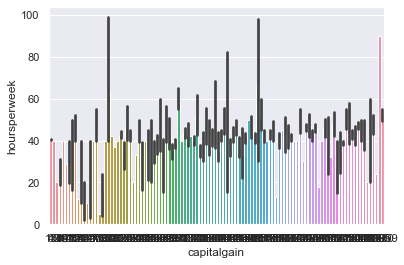

In [40]:
sns.barplot(f["capitalgain"],f["hoursperweek"])

C:\Users\samrat\anaconda3\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='educationno', ylabel='age'>

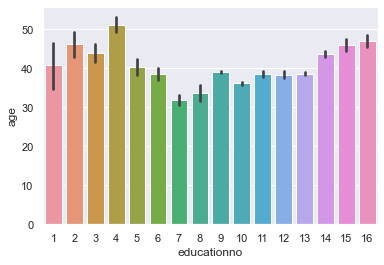

In [41]:
sns.barplot(f["educationno"],f["age"])

C:\Users\samrat\anaconda3\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='hoursperweek', ylabel='capitalloss'>

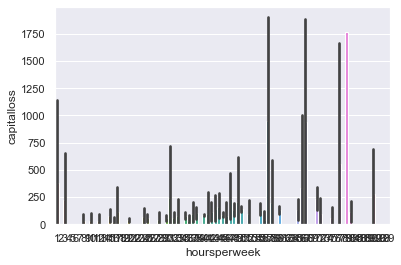

In [42]:
sns.barplot(f["hoursperweek"],f["capitalloss"])

C:\Users\samrat\anaconda3\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='hoursperweek', ylabel='Density'>

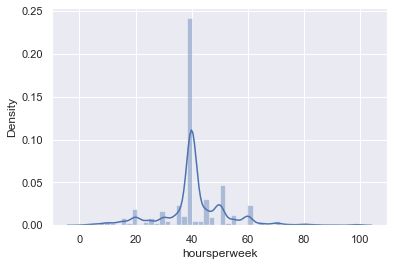

In [43]:
sns.distplot(f['hoursperweek'])

C:\Users\samrat\anaconda3\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='capitalgain', ylabel='Density'>

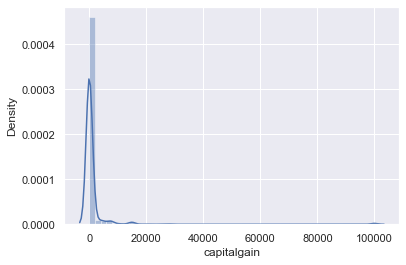

In [44]:
sns.distplot(f['capitalgain'])

C:\Users\samrat\anaconda3\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


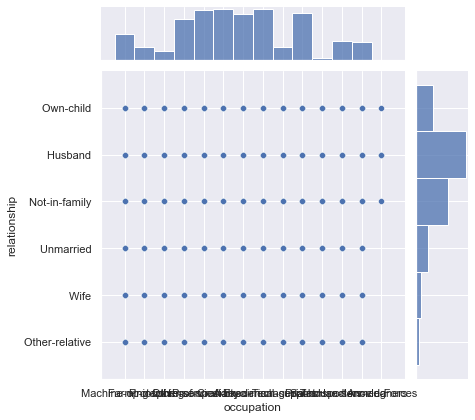

In [45]:
sns.jointplot(f['occupation'],f['relationship'])

C:\Users\samrat\anaconda3\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


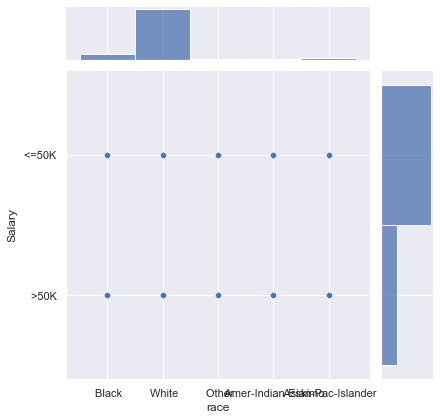

In [46]:
sns.jointplot(f['race'],f['Salary'])

C:\Users\samrat\anaconda3\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


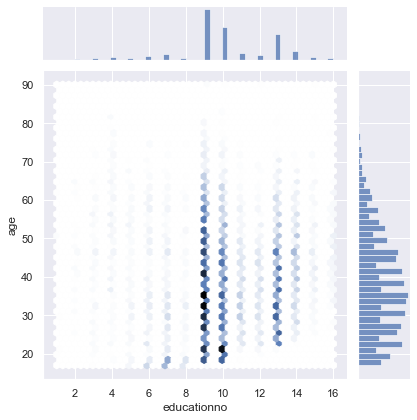

In [52]:
sns.jointplot(f['educationno'],f['age'], kind="hex")

C:\Users\samrat\anaconda3\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


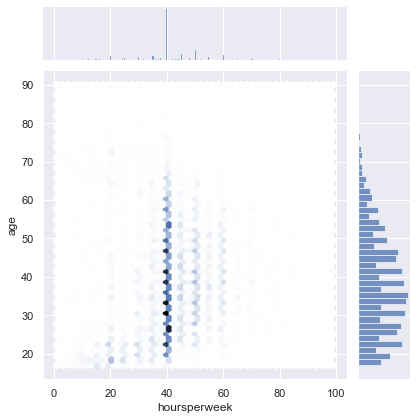

In [68]:
sns.jointplot(f['hoursperweek'],f['age'], kind="hex")

C:\Users\samrat\anaconda3\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


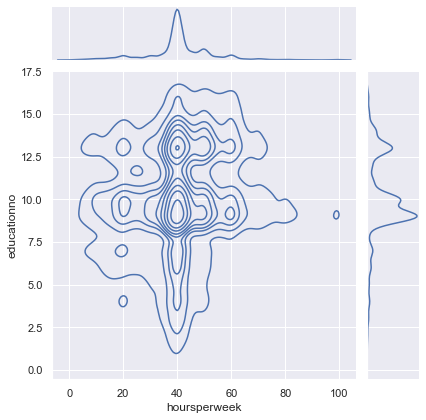

In [69]:
sns.jointplot(f['hoursperweek'],f['educationno'], kind="kde")

C:\Users\samrat\anaconda3\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


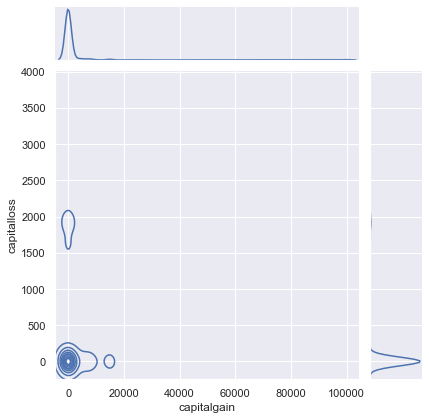

In [70]:
sns.jointplot(f['capitalgain'],f['capitalloss'], kind="kde")

C:\Users\samrat\anaconda3\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='hoursperweek', ylabel='capitalgain'>

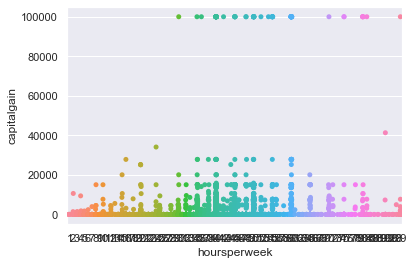

In [71]:
sns.stripplot(f['hoursperweek'],f['capitalgain'])

C:\Users\samrat\anaconda3\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age', ylabel='hoursperweek'>

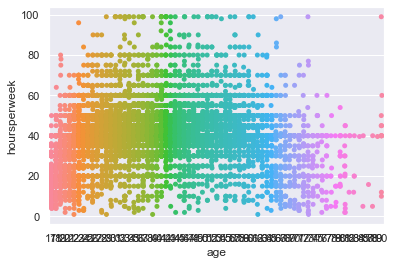

In [72]:
sns.stripplot(f['age'],f['hoursperweek'], jitter = True)

C:\Users\samrat\anaconda3\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='capitalgain', ylabel='hoursperweek'>

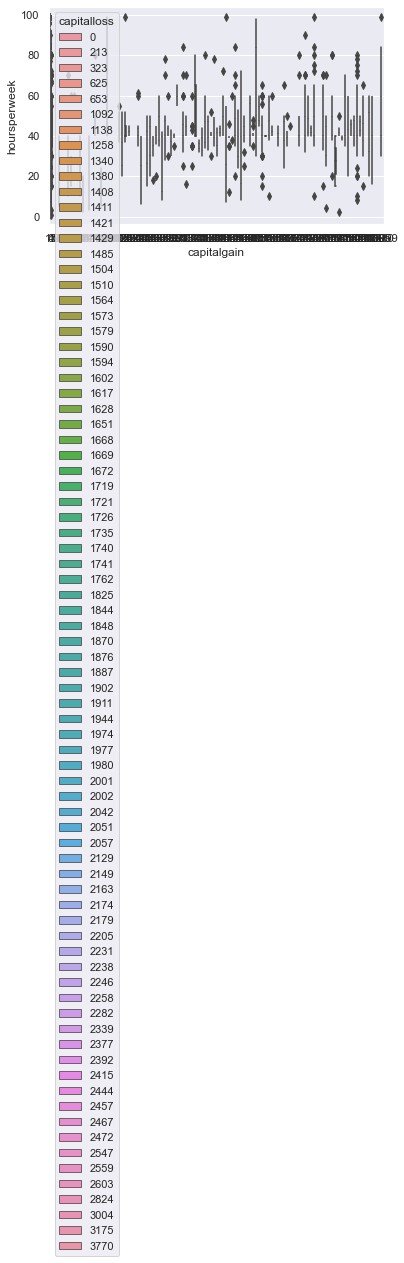

In [73]:
sns.boxplot(f['capitalgain'],f['hoursperweek'], hue=f['capitalloss'])

C:\Users\samrat\anaconda3\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age', ylabel='count'>

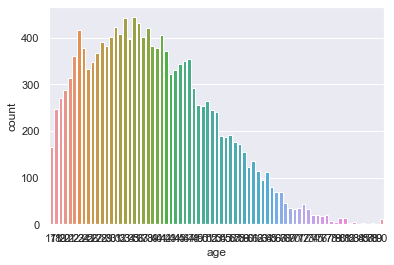

In [74]:
sns.countplot(f['age'])

C:\Users\samrat\anaconda3\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='hoursperweek', ylabel='capitalgain'>

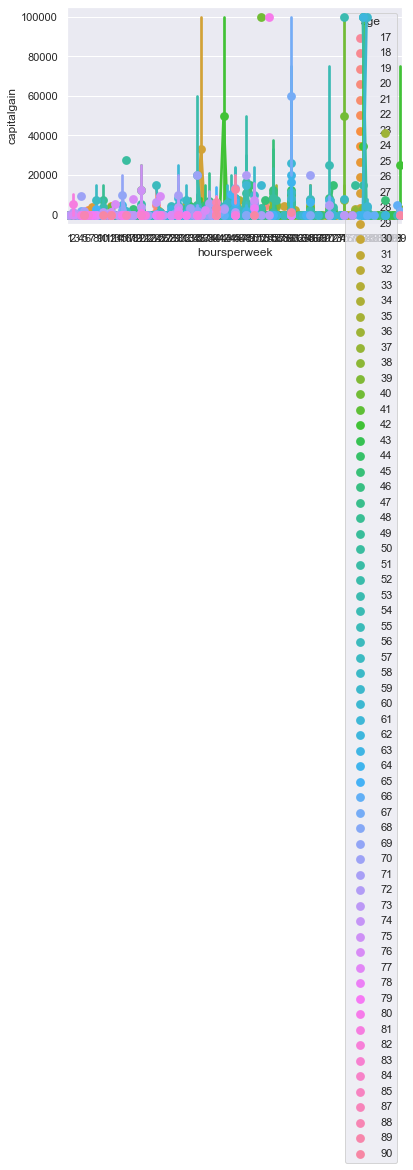

In [75]:
sns.pointplot(f['hoursperweek'],f['capitalgain'], hue=f['age'])

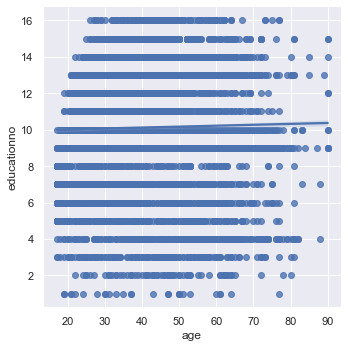

In [76]:
sns.lmplot(x='age',y='educationno', data=f)